# dwl2

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import requests
#import openpyxl # excel export

## player_count

In [2]:
player_count = pd.read_csv("player_count.csv")
player_count

,unix_time_stamp,player_count
0,1648201200,9424
1,1648201800,9596
2,1648202400,9771
3,1648203000,9845
4,1648203600,9973
...,...,...
4329,1650798600,17585
4330,1650799200,17785
4331,1650799800,17950
4332,1650800400,18208


In [3]:
# player_count minimum of 0 seems not accurate
player_count.describe()

,unix_time_stamp,player_count
count,4.334000e+03,4334.000000
mean,1.649501e+09,14795.019151
std,7.507574e+05,3925.692105
min,1.648201e+09,0.000000
25%,1.648851e+09,11705.250000
50%,1.649501e+09,14603.000000
75%,1.650151e+09,17330.500000
max,1.650801e+09,25116.000000


In [4]:
# no null values
player_count.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4334 entries, 0 to 4333
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   unix_time_stamp  4334 non-null   int64
 1   player_count     4334 non-null   int64
dtypes: int64(2)
memory usage: 67.8 KB


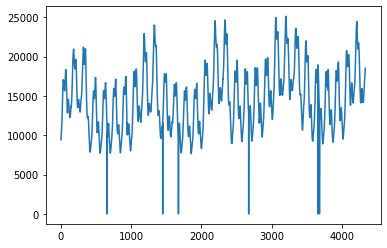

In [5]:
# several low peaks - probably value = 0
player_count["player_count"].plot()
plt.show()

In [6]:
# create dublicate
player_count_adjusted = player_count

In [7]:
# unix_time_stamp to datetime
player_count_adjusted["datetime"] = pd.to_datetime(player_count_adjusted["unix_time_stamp"], unit = "s")
player_count_adjusted = player_count_adjusted[["datetime", "player_count"]]
player_count_adjusted

,datetime,player_count
0,2022-03-25 09:40:00,9424
1,2022-03-25 09:50:00,9596
2,2022-03-25 10:00:00,9771
3,2022-03-25 10:10:00,9845
4,2022-03-25 10:20:00,9973
...,...,...
4329,2022-04-24 11:10:00,17585
4330,2022-04-24 11:20:00,17785
4331,2022-04-24 11:30:00,17950
4332,2022-04-24 11:40:00,18208


In [8]:
# search for NaN values
player_count_adjusted[player_count_adjusted.isna().any(axis = 1)]

,datetime,player_count


In [9]:
# search for low peaks
# 6005 is probably too low as well according to the plot - additionally it follows a 0 value
player_count_adjusted.loc[player_count_adjusted["player_count"] < 7000]

,datetime,player_count
657,2022-03-29 23:10:00,0
1449,2022-04-04 11:10:00,0
1673,2022-04-06 00:30:00,0
2673,2022-04-12 23:10:00,0
3658,2022-04-19 19:20:00,0
3681,2022-04-19 23:10:00,0
3682,2022-04-19 23:20:00,6005


In [10]:
# replace peaks with NaN
player_count_adjusted.loc[player_count_adjusted.player_count < 7000, "player_count"] = np.nan
player_count_adjusted[player_count_adjusted.isna().any(axis = 1)]

/var/folders/yn/y767b5755cb8g336ls40kmtc0000gn/T/ipykernel_57791/3005253230.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  player_count_adjusted.loc[player_count_adjusted.player_count < 7000, "player_count"] = np.nan


,datetime,player_count
657,2022-03-29 23:10:00,NaN
1449,2022-04-04 11:10:00,NaN
1673,2022-04-06 00:30:00,NaN
2673,2022-04-12 23:10:00,NaN
3658,2022-04-19 19:20:00,NaN
3681,2022-04-19 23:10:00,NaN
3682,2022-04-19 23:20:00,NaN


In [11]:
# linear interpolation for matching the pattern
player_count_adjusted["player_count"] = player_count_adjusted["player_count"].interpolate()
player_count_adjusted[player_count_adjusted.isna().any(axis = 1)]

/var/folders/yn/y767b5755cb8g336ls40kmtc0000gn/T/ipykernel_57791/960951235.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  player_count_adjusted["player_count"] = player_count_adjusted["player_count"].interpolate()


,datetime,player_count


In [12]:
player_count_adjusted.describe()

,player_count
count,4334.000000
mean,14813.274804
std,3887.707712
min,7650.000000
25%,11714.500000
50%,14605.500000
75%,17335.500000
max,25116.000000


In [13]:
player_count_adjusted.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4334 entries, 0 to 4333
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   datetime      4334 non-null   datetime64[ns]
 1   player_count  4334 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 67.8 KB


In [14]:
# convert player count to integer
player_count_adjusted["player_count"] = player_count_adjusted["player_count"].astype("int")
player_count_adjusted

/var/folders/yn/y767b5755cb8g336ls40kmtc0000gn/T/ipykernel_57791/2628660330.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  player_count_adjusted["player_count"] = player_count_adjusted["player_count"].astype("int")


,datetime,player_count
0,2022-03-25 09:40:00,9424
1,2022-03-25 09:50:00,9596
2,2022-03-25 10:00:00,9771
3,2022-03-25 10:10:00,9845
4,2022-03-25 10:20:00,9973
...,...,...
4329,2022-04-24 11:10:00,17585
4330,2022-04-24 11:20:00,17785
4331,2022-04-24 11:30:00,17950
4332,2022-04-24 11:40:00,18208


In [15]:
player_count_adjusted.describe()

,player_count
count,4334.000000
mean,14813.274573
std,3887.707873
min,7650.000000
25%,11714.500000
50%,14605.500000
75%,17335.500000
max,25116.000000


In [16]:
player_count_adjusted.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4334 entries, 0 to 4333
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   datetime      4334 non-null   datetime64[ns]
 1   player_count  4334 non-null   int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 67.8 KB


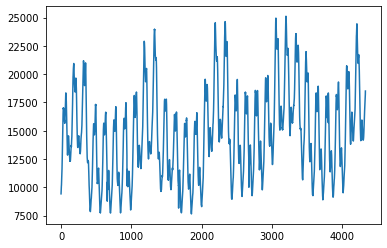

In [17]:
# low peaks have been replaced
player_count_adjusted["player_count"].plot()
plt.show()

In [18]:
# export to csv
player_count_adjusted.to_csv("player_count_adjusted.csv", index = False)

## match_history

In [19]:
match_history = pd.read_csv("match_history.csv")
match_history

,match_id,map,server,started,finished,steam_id_a,steam_id_b,country_a,country_b,rating_a,rating_b,rating_change_a,rating_change_b,civilization_a,civilization_b,win_a,win_b
0,150510221,72,ukwest,1648114790,1.648117e+09,7.656120e+16,7.656120e+16,EE,RO,883.0,898.0,16.0,-16.0,15.0,13.0,True,False
1,150510192,9,ukwest,1648114796,1.648117e+09,7.656120e+16,7.656120e+16,US,DK,732.0,NaN,-13.0,NaN,2.0,27.0,False,True
2,150510274,9,ukwest,1648114808,1.648117e+09,7.656120e+16,7.656120e+16,FR,DE,1144.0,1176.0,17.0,NaN,18.0,25.0,True,False
3,150510276,77,ukwest,1648114816,1.648116e+09,NaN,7.656120e+16,NaN,FI,1107.0,1129.0,-14.0,14.0,32.0,35.0,False,True
4,150510270,29,southeastasia,1648114812,1.648116e+09,7.656120e+16,7.656120e+16,IN,CN,530.0,670.0,-9.0,13.0,3.0,2.0,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
511736,155880960,29,eastus,1650745770,1.650746e+09,7.656120e+16,7.656120e+16,DO,JP,1493.0,1504.0,16.0,-16.0,8.0,8.0,True,False
511737,155881049,19,brazilsouth,1650745782,1.650748e+09,7.656120e+16,7.656120e+16,BR,AR,800.0,856.0,-14.0,NaN,24.0,29.0,False,True
511738,155881067,9,ukwest,1650745770,1.650747e+09,7.656120e+16,7.656120e+16,ES,DE,1156.0,1153.0,-16.0,16.0,29.0,2.0,False,True
511739,155881191,9,ukwest,1650745797,1.650747e+09,7.656120e+16,7.656120e+16,CZ,DE,2214.0,2239.0,-11.0,11.0,18.0,3.0,False,True


In [20]:
# nothing extrordinary can be observed
# is a minimum of of for rating_a possible?
match_history.describe()

,match_id,map,started,finished,steam_id_a,steam_id_b,rating_a,rating_b,rating_change_a,rating_change_b,civilization_a,civilization_b
count,5.117410e+05,511741.000000,5.117410e+05,5.117310e+05,4.788140e+05,4.801110e+05,481057.000000,480960.000000,321559.000000,321599.000000,511740.000000,511740.000000
mean,1.531348e+08,55.422952,1.649434e+09,1.649435e+09,7.656120e+16,7.656120e+16,1098.784539,1107.889777,0.118824,0.339395,17.631194,17.660816
std,1.539474e+06,58.193098,7.568856e+05,7.568820e+05,4.644818e+08,4.644268e+08,316.811233,315.356608,15.746871,15.722383,11.542331,11.565955
min,1.505102e+08,9.000000,1.648115e+09,1.648115e+09,7.656120e+16,7.656120e+16,0.000000,32.000000,-50.000000,-52.000000,1.000000,1.000000
25%,1.517687e+08,9.000000,1.648774e+09,1.648776e+09,7.656120e+16,7.656120e+16,885.000000,891.000000,-15.000000,-16.000000,8.000000,8.000000
50%,1.530764e+08,29.000000,1.649446e+09,1.649448e+09,7.656120e+16,7.656120e+16,1054.000000,1058.000000,-11.000000,13.000000,16.000000,16.000000
75%,1.544759e+08,77.000000,1.650097e+09,1.650098e+09,7.656120e+16,7.656120e+16,1276.000000,1282.000000,16.000000,15.000000,27.000000,27.000000
max,1.558812e+08,167.000000,1.650746e+09,1.650750e+09,7.656120e+16,7.656120e+16,2589.000000,2587.000000,49.000000,43.000000,39.000000,141.000000


In [21]:
# lots of null values
match_history.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 511741 entries, 0 to 511740
Data columns (total 17 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   match_id         511741 non-null  int64  
 1   map              511741 non-null  int64  
 2   server           455489 non-null  object 
 3   started          511741 non-null  int64  
 4   finished         511731 non-null  float64
 5   steam_id_a       478814 non-null  float64
 6   steam_id_b       480111 non-null  float64
 7   country_a        478728 non-null  object 
 8   country_b        480036 non-null  object 
 9   rating_a         481057 non-null  float64
 10  rating_b         480960 non-null  float64
 11  rating_change_a  321559 non-null  float64
 12  rating_change_b  321599 non-null  float64
 13  civilization_a   511740 non-null  float64
 14  civilization_b   511740 non-null  float64
 15  win_a            508645 non-null  object 
 16  win_b            508645 non-null  obje

In [22]:
# check whit an api request if a missing values is still missing (steam_id_a of match_id 150510276) -> yes
request = requests.get("https://aoe2.net/api/matches?game=aoe2de&count=2&since=1648114816")
request = request.json()
request[1]

{'match_id': '150510276',
 'lobby_id': None,
 'match_uuid': '39b188e7-7fb2-3b46-b352-45937f2dbbdf',
 'version': '59165',
 'name': 'AUTOMATCH',
 'num_players': 2,
 'num_slots': 2,
 'average_rating': None,
 'cheats': False,
 'full_tech_tree': False,
 'ending_age': 5,
 'expansion': None,
 'game_type': 0,
 'has_custom_content': None,
 'has_password': True,
 'lock_speed': True,
 'lock_teams': True,
 'map_size': 0,
 'map_type': 77,
 'pop': 200,
 'ranked': True,
 'leaderboard_id': 3,
 'rating_type': 2,
 'resources': 1,
 'rms': None,
 'scenario': None,
 'server': 'ukwest',
 'shared_exploration': False,
 'speed': 2,
 'starting_age': 2,
 'team_together': True,
 'team_positions': True,
 'treaty_length': 0,
 'turbo': False,
 'victory': 1,
 'victory_time': 0,
 'visibility': 0,
 'opened': 1648114816,
 'started': 1648114816,
 'finished': 1648115978,
 'players': [{'profile_id': 1862683,
   'steam_id': None,
   'name': 'TuliTulo',
   'clan': None,
   'country': None,
   'slot': 1,
   'slot_type': 1,
  

In [23]:
# create dublicate
match_history_adjusted = match_history

In [24]:
# rename map to map_id
match_history.rename(columns = {"map": "map_id"}, inplace = True)

In [25]:
# delete matches with no winner or steam id
# those matches are not suitable for the visualization
match_history_adjusted = match_history_adjusted.dropna(axis = 0, subset = ["win_a"])
match_history_adjusted = match_history_adjusted.dropna(axis = 0, subset = ["win_b"])
match_history_adjusted = match_history_adjusted.dropna(axis = 0, subset = ["steam_id_a"])
match_history_adjusted = match_history_adjusted.dropna(axis = 0, subset = ["steam_id_b"])

In [26]:
# drop rating_change_a and rating_change_b
# information not suitable for the visualization
match_history_adjusted = match_history_adjusted.drop(["rating_change_a", "rating_change_b"], axis = 1)

In [27]:
# still lots of null values under server, country_a, country_b, rating_a, rating_b
# not a problem for the visualization
match_history_adjusted.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 447329 entries, 0 to 511740
Data columns (total 15 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   match_id        447329 non-null  int64  
 1   map_id          447329 non-null  int64  
 2   server          397732 non-null  object 
 3   started         447329 non-null  int64  
 4   finished        447329 non-null  float64
 5   steam_id_a      447329 non-null  float64
 6   steam_id_b      447329 non-null  float64
 7   country_a       447254 non-null  object 
 8   country_b       447258 non-null  object 
 9   rating_a        422285 non-null  float64
 10  rating_b        422153 non-null  float64
 11  civilization_a  447329 non-null  float64
 12  civilization_b  447329 non-null  float64
 13  win_a           447329 non-null  object 
 14  win_b           447329 non-null  object 
dtypes: float64(7), int64(3), object(5)
memory usage: 54.6+ MB


In [28]:
# categorize matchups into winner and loser information instead of a and b
match_history_adjusted["steam_id_win"] = match_history_adjusted.apply(lambda x: x["steam_id_a"] if x["win_a"] == True else x["steam_id_b"], axis = 1)
match_history_adjusted["steam_id_lose"] = match_history_adjusted.apply(lambda x: x["steam_id_b"] if x["win_a"] == True else x["steam_id_a"], axis = 1)
match_history_adjusted["country_win"] = match_history_adjusted.apply(lambda x: x["country_a"] if x["win_a"] == True else x["country_b"], axis = 1)
match_history_adjusted["country_lose"] = match_history_adjusted.apply(lambda x: x["country_b"] if x["win_a"] == True else x["country_a"], axis = 1)
match_history_adjusted["rating_win"] = match_history_adjusted.apply(lambda x: x["rating_a"] if x["win_a"] == True else x["rating_b"], axis = 1)
match_history_adjusted["rating_lose"] = match_history_adjusted.apply(lambda x: x["rating_b"] if x["win_a"] == True else x["rating_a"], axis = 1)
match_history_adjusted["civilization_win"] = match_history_adjusted.apply(lambda x: x["civilization_a"] if x["win_a"] == True else x["civilization_b"], axis = 1)
match_history_adjusted["civilization_lose"] = match_history_adjusted.apply(lambda x: x["civilization_b"] if x["win_a"] == True else x["civilization_a"], axis = 1)

In [29]:
# drop a and b information
match_history_adjusted = match_history_adjusted.drop(["steam_id_a", "steam_id_b", "country_a", "country_b", "rating_a", "rating_b", "civilization_a", "civilization_b", "win_a", "win_b"], axis = 1)

In [30]:
# decode the civilisations and map keys via api
request = requests.get("https://aoe2.net/api/strings?game=aoe2de&language=en")
request = request.json()
request

{'language': 'en',
 'age': [{'id': 0, 'string': 'Standard'},
  {'id': 2, 'string': 'Dark Age'},
  {'id': 3, 'string': 'Feudal Age'},
  {'id': 4, 'string': 'Castle Age'},
  {'id': 5, 'string': 'Imperial Age'},
  {'id': 6, 'string': 'Post-Imperial Age'}],
 'civ': [{'id': 1, 'string': 'Britons'},
  {'id': 2, 'string': 'Franks'},
  {'id': 3, 'string': 'Goths'},
  {'id': 4, 'string': 'Teutons'},
  {'id': 5, 'string': 'Japanese'},
  {'id': 6, 'string': 'Chinese'},
  {'id': 7, 'string': 'Byzantines'},
  {'id': 8, 'string': 'Persians'},
  {'id': 9, 'string': 'Saracens'},
  {'id': 10, 'string': 'Turks'},
  {'id': 11, 'string': 'Vikings'},
  {'id': 12, 'string': 'Mongols'},
  {'id': 13, 'string': 'Celts'},
  {'id': 14, 'string': 'Spanish'},
  {'id': 15, 'string': 'Aztecs'},
  {'id': 16, 'string': 'Mayans'},
  {'id': 17, 'string': 'Huns'},
  {'id': 18, 'string': 'Koreans'},
  {'id': 19, 'string': 'Italians'},
  {'id': 20, 'string': 'Hindustanis'},
  {'id': 21, 'string': 'Incas'},
  {'id': 22, 'st

In [31]:
# read in civilization keys
civilizations = request["civ"]
civilizations = pd.DataFrame.from_dict(civilizations)
civilizations

,id,string
0,1,Britons
1,2,Franks
2,3,Goths
3,4,Teutons
4,5,Japanese
5,6,Chinese
6,7,Byzantines
7,8,Persians
8,9,Saracens
9,10,Turks


In [32]:
# replace civilization key with civilization name for civilization_win
match_history_adjusted = pd.merge(match_history_adjusted, civilizations, how = "left", left_on = "civilization_win", right_on = "id")
match_history_adjusted = match_history_adjusted.drop(["civilization_win", "id"], axis = 1)
match_history_adjusted = match_history_adjusted.rename(columns = {"string": "civilization_win"})
match_history_adjusted

,match_id,map_id,server,started,finished,steam_id_win,steam_id_lose,country_win,country_lose,rating_win,rating_lose,civilization_lose,civilization_win
0,150510221,72,ukwest,1648114790,1.648117e+09,7.656120e+16,7.656120e+16,EE,RO,883.0,898.0,13.0,Aztecs
1,150510192,9,ukwest,1648114796,1.648117e+09,7.656120e+16,7.656120e+16,DK,US,NaN,732.0,2.0,Berbers
2,150510274,9,ukwest,1648114808,1.648117e+09,7.656120e+16,7.656120e+16,FR,DE,1144.0,1176.0,25.0,Koreans
3,150510270,29,southeastasia,1648114812,1.648116e+09,7.656120e+16,7.656120e+16,CN,IN,670.0,530.0,3.0,Franks
4,150510263,77,westindia,1648114820,1.648116e+09,7.656120e+16,7.656120e+16,TW,DE,1388.0,1379.0,14.0,Ethiopians
...,...,...,...,...,...,...,...,...,...,...,...,...,...
447324,155880960,29,eastus,1650745770,1.650746e+09,7.656120e+16,7.656120e+16,DO,JP,1493.0,1504.0,8.0,Persians
447325,155881049,19,brazilsouth,1650745782,1.650748e+09,7.656120e+16,7.656120e+16,AR,BR,856.0,800.0,24.0,Malay
447326,155881067,9,ukwest,1650745770,1.650747e+09,7.656120e+16,7.656120e+16,DE,ES,1153.0,1156.0,29.0,Franks
447327,155881191,9,ukwest,1650745797,1.650747e+09,7.656120e+16,7.656120e+16,DE,CZ,2239.0,2214.0,18.0,Goths


In [33]:
# replace civilization key with civilization name for civilization_lose
match_history_adjusted = pd.merge(match_history_adjusted, civilizations, how = "left", left_on = "civilization_lose", right_on = "id")
match_history_adjusted = match_history_adjusted.drop(["civilization_lose", "id"], axis = 1)
match_history_adjusted = match_history_adjusted.rename(columns = {"string": "civilization_lose"})
match_history_adjusted

,match_id,map_id,server,started,finished,steam_id_win,steam_id_lose,country_win,country_lose,rating_win,rating_lose,civilization_win,civilization_lose
0,150510221,72,ukwest,1648114790,1.648117e+09,7.656120e+16,7.656120e+16,EE,RO,883.0,898.0,Aztecs,Celts
1,150510192,9,ukwest,1648114796,1.648117e+09,7.656120e+16,7.656120e+16,DK,US,NaN,732.0,Berbers,Franks
2,150510274,9,ukwest,1648114808,1.648117e+09,7.656120e+16,7.656120e+16,FR,DE,1144.0,1176.0,Koreans,Ethiopians
3,150510270,29,southeastasia,1648114812,1.648116e+09,7.656120e+16,7.656120e+16,CN,IN,670.0,530.0,Franks,Goths
4,150510263,77,westindia,1648114820,1.648116e+09,7.656120e+16,7.656120e+16,TW,DE,1388.0,1379.0,Ethiopians,Spanish
...,...,...,...,...,...,...,...,...,...,...,...,...,...
447324,155880960,29,eastus,1650745770,1.650746e+09,7.656120e+16,7.656120e+16,DO,JP,1493.0,1504.0,Persians,Persians
447325,155881049,19,brazilsouth,1650745782,1.650748e+09,7.656120e+16,7.656120e+16,AR,BR,856.0,800.0,Malay,Portuguese
447326,155881067,9,ukwest,1650745770,1.650747e+09,7.656120e+16,7.656120e+16,DE,ES,1153.0,1156.0,Franks,Malay
447327,155881191,9,ukwest,1650745797,1.650747e+09,7.656120e+16,7.656120e+16,DE,CZ,2239.0,2214.0,Goths,Koreans


In [34]:
# read in map keys
maps = request["map_type"]
maps = pd.DataFrame.from_dict(maps)
maps

,id,string
0,9,Arabia
1,10,Archipelago
2,11,Baltic
3,12,Black Forest
4,13,Coastal
...,...,...
138,170,Haboob
139,171,Kawasan
140,172,Land Madness
141,173,Sacred Springs


In [35]:
# replace map key with map name
match_history_adjusted = pd.merge(match_history_adjusted, maps, how = "left", left_on = "map_id", right_on = "id")
match_history_adjusted = match_history_adjusted.drop(["map_id", "id"], axis = 1)
match_history_adjusted = match_history_adjusted.rename(columns = {"string": "map"})
match_history_adjusted

,match_id,server,started,finished,steam_id_win,steam_id_lose,country_win,country_lose,rating_win,rating_lose,civilization_win,civilization_lose,map
0,150510221,ukwest,1648114790,1.648117e+09,7.656120e+16,7.656120e+16,EE,RO,883.0,898.0,Aztecs,Celts,Hideout
1,150510192,ukwest,1648114796,1.648117e+09,7.656120e+16,7.656120e+16,DK,US,NaN,732.0,Berbers,Franks,Arabia
2,150510274,ukwest,1648114808,1.648117e+09,7.656120e+16,7.656120e+16,FR,DE,1144.0,1176.0,Koreans,Ethiopians,Arabia
3,150510270,southeastasia,1648114812,1.648116e+09,7.656120e+16,7.656120e+16,CN,IN,670.0,530.0,Franks,Goths,Arena
4,150510263,westindia,1648114820,1.648116e+09,7.656120e+16,7.656120e+16,TW,DE,1388.0,1379.0,Ethiopians,Spanish,MegaRandom
...,...,...,...,...,...,...,...,...,...,...,...,...,...
447324,155880960,eastus,1650745770,1.650746e+09,7.656120e+16,7.656120e+16,DO,JP,1493.0,1504.0,Persians,Persians,Arena
447325,155881049,brazilsouth,1650745782,1.650748e+09,7.656120e+16,7.656120e+16,AR,BR,856.0,800.0,Malay,Portuguese,Islands
447326,155881067,ukwest,1650745770,1.650747e+09,7.656120e+16,7.656120e+16,DE,ES,1153.0,1156.0,Franks,Malay,Arabia
447327,155881191,ukwest,1650745797,1.650747e+09,7.656120e+16,7.656120e+16,DE,CZ,2239.0,2214.0,Goths,Koreans,Arabia


In [36]:
# decode country keys via additional api
request = requests.get("https://restcountries.com/v3.1/all")
request = request.json()
request

[{'name': {'common': 'Dominican Republic',
   'official': 'Dominican Republic',
   'nativeName': {'spa': {'official': 'República Dominicana',
     'common': 'República Dominicana'}}},
  'tld': ['.do'],
  'cca2': 'DO',
  'ccn3': '214',
  'cca3': 'DOM',
  'cioc': 'DOM',
  'independent': True,
  'status': 'officially-assigned',
  'unMember': True,
  'currencies': {'DOP': {'name': 'Dominican peso', 'symbol': '$'}},
  'idd': {'root': '+1', 'suffixes': ['809', '829', '849']},
  'capital': ['Santo Domingo'],
  'altSpellings': ['DO'],
  'region': 'Americas',
  'subregion': 'Caribbean',
  'languages': {'spa': 'Spanish'},
  'translations': {'ara': {'official': 'جمهورية الدومينيكان',
    'common': 'جمهورية الدومينيكان'},
   'ces': {'official': 'Dominikánská republika',
    'common': 'Dominikánská republika'},
   'cym': {'official': 'Gweriniaeth Dominica',
    'common': 'Gweriniaeth Dominica'},
   'deu': {'official': 'Dominikanische Republik',
    'common': 'Dominikanische Republik'},
   'est': {'

In [37]:
# read in country keys
countries_common_name = [d["name"]["common"] for d in request]
countries_cca2 = [d["cca2"] for d in request]
countries = {"common_name": countries_common_name, "cca2": countries_cca2}
countries = pd.DataFrame(countries)
countries

,common_name,cca2
0,Dominican Republic,DO
1,Heard Island and McDonald Islands,HM
2,Ghana,GH
3,Italy,IT
4,Cambodia,KH
...,...,...
245,Niue,NU
246,Jordan,JO
247,Afghanistan,AF
248,Faroe Islands,FO


In [38]:
# replace country key with country name for country_win
match_history_adjusted = pd.merge(match_history_adjusted, countries, how = "left", left_on = "country_win", right_on = "cca2")
match_history_adjusted = match_history_adjusted.drop(["country_win", "cca2"], axis = 1)
match_history_adjusted = match_history_adjusted.rename(columns = {"common_name": "country_win"})
match_history_adjusted

,match_id,server,started,finished,steam_id_win,steam_id_lose,country_lose,rating_win,rating_lose,civilization_win,civilization_lose,map,country_win
0,150510221,ukwest,1648114790,1.648117e+09,7.656120e+16,7.656120e+16,RO,883.0,898.0,Aztecs,Celts,Hideout,Estonia
1,150510192,ukwest,1648114796,1.648117e+09,7.656120e+16,7.656120e+16,US,NaN,732.0,Berbers,Franks,Arabia,Denmark
2,150510274,ukwest,1648114808,1.648117e+09,7.656120e+16,7.656120e+16,DE,1144.0,1176.0,Koreans,Ethiopians,Arabia,France
3,150510270,southeastasia,1648114812,1.648116e+09,7.656120e+16,7.656120e+16,IN,670.0,530.0,Franks,Goths,Arena,China
4,150510263,westindia,1648114820,1.648116e+09,7.656120e+16,7.656120e+16,DE,1388.0,1379.0,Ethiopians,Spanish,MegaRandom,Taiwan
...,...,...,...,...,...,...,...,...,...,...,...,...,...
447324,155880960,eastus,1650745770,1.650746e+09,7.656120e+16,7.656120e+16,JP,1493.0,1504.0,Persians,Persians,Arena,Dominican Republic
447325,155881049,brazilsouth,1650745782,1.650748e+09,7.656120e+16,7.656120e+16,BR,856.0,800.0,Malay,Portuguese,Islands,Argentina
447326,155881067,ukwest,1650745770,1.650747e+09,7.656120e+16,7.656120e+16,ES,1153.0,1156.0,Franks,Malay,Arabia,Germany
447327,155881191,ukwest,1650745797,1.650747e+09,7.656120e+16,7.656120e+16,CZ,2239.0,2214.0,Goths,Koreans,Arabia,Germany


In [39]:
# replace country key with country name for country_lose
match_history_adjusted = pd.merge(match_history_adjusted, countries, how = "left", left_on = "country_lose", right_on = "cca2")
match_history_adjusted = match_history_adjusted.drop(["country_lose", "cca2"], axis = 1)
match_history_adjusted = match_history_adjusted.rename(columns = {"common_name": "country_lose"})
match_history_adjusted

,match_id,server,started,finished,steam_id_win,steam_id_lose,rating_win,rating_lose,civilization_win,civilization_lose,map,country_win,country_lose
0,150510221,ukwest,1648114790,1.648117e+09,7.656120e+16,7.656120e+16,883.0,898.0,Aztecs,Celts,Hideout,Estonia,Romania
1,150510192,ukwest,1648114796,1.648117e+09,7.656120e+16,7.656120e+16,NaN,732.0,Berbers,Franks,Arabia,Denmark,United States
2,150510274,ukwest,1648114808,1.648117e+09,7.656120e+16,7.656120e+16,1144.0,1176.0,Koreans,Ethiopians,Arabia,France,Germany
3,150510270,southeastasia,1648114812,1.648116e+09,7.656120e+16,7.656120e+16,670.0,530.0,Franks,Goths,Arena,China,India
4,150510263,westindia,1648114820,1.648116e+09,7.656120e+16,7.656120e+16,1388.0,1379.0,Ethiopians,Spanish,MegaRandom,Taiwan,Germany
...,...,...,...,...,...,...,...,...,...,...,...,...,...
447324,155880960,eastus,1650745770,1.650746e+09,7.656120e+16,7.656120e+16,1493.0,1504.0,Persians,Persians,Arena,Dominican Republic,Japan
447325,155881049,brazilsouth,1650745782,1.650748e+09,7.656120e+16,7.656120e+16,856.0,800.0,Malay,Portuguese,Islands,Argentina,Brazil
447326,155881067,ukwest,1650745770,1.650747e+09,7.656120e+16,7.656120e+16,1153.0,1156.0,Franks,Malay,Arabia,Germany,Spain
447327,155881191,ukwest,1650745797,1.650747e+09,7.656120e+16,7.656120e+16,2239.0,2214.0,Goths,Koreans,Arabia,Germany,Czechia


In [40]:
# calculate match duration in minutes
match_history_adjusted["duration_min"] = match_history_adjusted["finished"] - match_history_adjusted["started"]
match_history_adjusted["duration_min"] = match_history_adjusted["duration_min"] / 60
match_history_adjusted["duration_min"] = round(match_history_adjusted["duration_min"])
match_history_adjusted

,match_id,server,started,finished,steam_id_win,steam_id_lose,rating_win,rating_lose,civilization_win,civilization_lose,map,country_win,country_lose,duration_min
0,150510221,ukwest,1648114790,1.648117e+09,7.656120e+16,7.656120e+16,883.0,898.0,Aztecs,Celts,Hideout,Estonia,Romania,30.0
1,150510192,ukwest,1648114796,1.648117e+09,7.656120e+16,7.656120e+16,NaN,732.0,Berbers,Franks,Arabia,Denmark,United States,32.0
2,150510274,ukwest,1648114808,1.648117e+09,7.656120e+16,7.656120e+16,1144.0,1176.0,Koreans,Ethiopians,Arabia,France,Germany,32.0
3,150510270,southeastasia,1648114812,1.648116e+09,7.656120e+16,7.656120e+16,670.0,530.0,Franks,Goths,Arena,China,India,21.0
4,150510263,westindia,1648114820,1.648116e+09,7.656120e+16,7.656120e+16,1388.0,1379.0,Ethiopians,Spanish,MegaRandom,Taiwan,Germany,21.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
447324,155880960,eastus,1650745770,1.650746e+09,7.656120e+16,7.656120e+16,1493.0,1504.0,Persians,Persians,Arena,Dominican Republic,Japan,4.0
447325,155881049,brazilsouth,1650745782,1.650748e+09,7.656120e+16,7.656120e+16,856.0,800.0,Malay,Portuguese,Islands,Argentina,Brazil,35.0
447326,155881067,ukwest,1650745770,1.650747e+09,7.656120e+16,7.656120e+16,1153.0,1156.0,Franks,Malay,Arabia,Germany,Spain,14.0
447327,155881191,ukwest,1650745797,1.650747e+09,7.656120e+16,7.656120e+16,2239.0,2214.0,Goths,Koreans,Arabia,Germany,Czechia,19.0


In [41]:
# unix_time_stamp to datetime for started
match_history_adjusted["started_datetime"] = pd.to_datetime(match_history_adjusted["started"], unit = "s")
match_history_adjusted = match_history_adjusted.drop(["started"], axis = 1)
match_history_adjusted

,match_id,server,finished,steam_id_win,steam_id_lose,rating_win,rating_lose,civilization_win,civilization_lose,map,country_win,country_lose,duration_min,started_datetime
0,150510221,ukwest,1.648117e+09,7.656120e+16,7.656120e+16,883.0,898.0,Aztecs,Celts,Hideout,Estonia,Romania,30.0,2022-03-24 09:39:50
1,150510192,ukwest,1.648117e+09,7.656120e+16,7.656120e+16,NaN,732.0,Berbers,Franks,Arabia,Denmark,United States,32.0,2022-03-24 09:39:56
2,150510274,ukwest,1.648117e+09,7.656120e+16,7.656120e+16,1144.0,1176.0,Koreans,Ethiopians,Arabia,France,Germany,32.0,2022-03-24 09:40:08
3,150510270,southeastasia,1.648116e+09,7.656120e+16,7.656120e+16,670.0,530.0,Franks,Goths,Arena,China,India,21.0,2022-03-24 09:40:12
4,150510263,westindia,1.648116e+09,7.656120e+16,7.656120e+16,1388.0,1379.0,Ethiopians,Spanish,MegaRandom,Taiwan,Germany,21.0,2022-03-24 09:40:20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
447324,155880960,eastus,1.650746e+09,7.656120e+16,7.656120e+16,1493.0,1504.0,Persians,Persians,Arena,Dominican Republic,Japan,4.0,2022-04-23 20:29:30
447325,155881049,brazilsouth,1.650748e+09,7.656120e+16,7.656120e+16,856.0,800.0,Malay,Portuguese,Islands,Argentina,Brazil,35.0,2022-04-23 20:29:42
447326,155881067,ukwest,1.650747e+09,7.656120e+16,7.656120e+16,1153.0,1156.0,Franks,Malay,Arabia,Germany,Spain,14.0,2022-04-23 20:29:30
447327,155881191,ukwest,1.650747e+09,7.656120e+16,7.656120e+16,2239.0,2214.0,Goths,Koreans,Arabia,Germany,Czechia,19.0,2022-04-23 20:29:57


In [42]:
# unix_time_stamp to datetime for finished
match_history_adjusted["finished_datetime"] = pd.to_datetime(match_history_adjusted["finished"], unit = "s")
match_history_adjusted = match_history_adjusted.drop(["finished"], axis = 1)
match_history_adjusted

,match_id,server,steam_id_win,steam_id_lose,rating_win,rating_lose,civilization_win,civilization_lose,map,country_win,country_lose,duration_min,started_datetime,finished_datetime
0,150510221,ukwest,7.656120e+16,7.656120e+16,883.0,898.0,Aztecs,Celts,Hideout,Estonia,Romania,30.0,2022-03-24 09:39:50,2022-03-24 10:09:44
1,150510192,ukwest,7.656120e+16,7.656120e+16,NaN,732.0,Berbers,Franks,Arabia,Denmark,United States,32.0,2022-03-24 09:39:56,2022-03-24 10:12:16
2,150510274,ukwest,7.656120e+16,7.656120e+16,1144.0,1176.0,Koreans,Ethiopians,Arabia,France,Germany,32.0,2022-03-24 09:40:08,2022-03-24 10:11:50
3,150510270,southeastasia,7.656120e+16,7.656120e+16,670.0,530.0,Franks,Goths,Arena,China,India,21.0,2022-03-24 09:40:12,2022-03-24 10:01:31
4,150510263,westindia,7.656120e+16,7.656120e+16,1388.0,1379.0,Ethiopians,Spanish,MegaRandom,Taiwan,Germany,21.0,2022-03-24 09:40:20,2022-03-24 10:01:18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
447324,155880960,eastus,7.656120e+16,7.656120e+16,1493.0,1504.0,Persians,Persians,Arena,Dominican Republic,Japan,4.0,2022-04-23 20:29:30,2022-04-23 20:33:42
447325,155881049,brazilsouth,7.656120e+16,7.656120e+16,856.0,800.0,Malay,Portuguese,Islands,Argentina,Brazil,35.0,2022-04-23 20:29:42,2022-04-23 21:05:06
447326,155881067,ukwest,7.656120e+16,7.656120e+16,1153.0,1156.0,Franks,Malay,Arabia,Germany,Spain,14.0,2022-04-23 20:29:30,2022-04-23 20:43:48
447327,155881191,ukwest,7.656120e+16,7.656120e+16,2239.0,2214.0,Goths,Koreans,Arabia,Germany,Czechia,19.0,2022-04-23 20:29:57,2022-04-23 20:49:25


In [43]:
match_history_adjusted.describe()

,match_id,steam_id_win,steam_id_lose,rating_win,rating_lose,duration_min
count,4.473290e+05,4.473290e+05,4.473290e+05,427832.000000,416606.000000,447329.000000
mean,1.531350e+08,7.656120e+16,7.656120e+16,1126.287332,1126.501577,24.648737
std,1.539148e+06,4.657367e+08,4.628379e+08,319.592165,315.602629,12.475602
min,1.505102e+08,7.656120e+16,7.656120e+16,56.000000,0.000000,0.000000
25%,1.517685e+08,7.656120e+16,7.656120e+16,904.000000,909.000000,17.000000
50%,1.530787e+08,7.656120e+16,7.656120e+16,1076.000000,1080.000000,24.000000
75%,1.544750e+08,7.656120e+16,7.656120e+16,1305.000000,1305.000000,31.000000
max,1.558812e+08,7.656120e+16,7.656120e+16,2589.000000,2585.000000,1417.000000


In [44]:
match_history_adjusted.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 447329 entries, 0 to 447328
Data columns (total 14 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   match_id           447329 non-null  int64         
 1   server             397732 non-null  object        
 2   steam_id_win       447329 non-null  float64       
 3   steam_id_lose      447329 non-null  float64       
 4   rating_win         427832 non-null  float64       
 5   rating_lose        416606 non-null  float64       
 6   civilization_win   447326 non-null  object        
 7   civilization_lose  447329 non-null  object        
 8   map                447329 non-null  object        
 9   country_win        447198 non-null  object        
 10  country_lose       447205 non-null  object        
 11  duration_min       447329 non-null  float64       
 12  started_datetime   447329 non-null  datetime64[ns]
 13  finished_datetime  447329 non-null  datetime

In [45]:
# convert datatypes
match_history_adjusted["steam_id_win"] = match_history_adjusted["steam_id_win"].astype("Int64")
match_history_adjusted["steam_id_lose"] = match_history_adjusted["steam_id_lose"].astype("Int64")
match_history_adjusted["rating_win"] = match_history_adjusted["rating_win"].astype("Int64")
match_history_adjusted["rating_lose"] = match_history_adjusted["rating_lose"].astype("Int64")
match_history_adjusted["duration_min"] = match_history_adjusted["duration_min"].astype("Int64")
match_history_adjusted

,match_id,server,steam_id_win,steam_id_lose,rating_win,rating_lose,civilization_win,civilization_lose,map,country_win,country_lose,duration_min,started_datetime,finished_datetime
0,150510221,ukwest,76561198170624064,76561198091518880,883,898,Aztecs,Celts,Hideout,Estonia,Romania,30,2022-03-24 09:39:50,2022-03-24 10:09:44
1,150510192,ukwest,76561199023063056,76561198059599168,<NA>,732,Berbers,Franks,Arabia,Denmark,United States,32,2022-03-24 09:39:56,2022-03-24 10:12:16
2,150510274,ukwest,76561199235801312,76561197997394688,1144,1176,Koreans,Ethiopians,Arabia,France,Germany,32,2022-03-24 09:40:08,2022-03-24 10:11:50
3,150510270,southeastasia,76561198870212736,76561198100514832,670,530,Franks,Goths,Arena,China,India,21,2022-03-24 09:40:12,2022-03-24 10:01:31
4,150510263,westindia,76561199174111168,76561198328988144,1388,1379,Ethiopians,Spanish,MegaRandom,Taiwan,Germany,21,2022-03-24 09:40:20,2022-03-24 10:01:18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
447324,155880960,eastus,76561198807029680,76561199213255408,1493,1504,Persians,Persians,Arena,Dominican Republic,Japan,4,2022-04-23 20:29:30,2022-04-23 20:33:42
447325,155881049,brazilsouth,76561199162806832,76561199233969328,856,800,Malay,Portuguese,Islands,Argentina,Brazil,35,2022-04-23 20:29:42,2022-04-23 21:05:06
447326,155881067,ukwest,76561198942777760,76561198833193808,1153,1156,Franks,Malay,Arabia,Germany,Spain,14,2022-04-23 20:29:30,2022-04-23 20:43:48
447327,155881191,ukwest,76561199088383248,76561198062424736,2239,2214,Goths,Koreans,Arabia,Germany,Czechia,19,2022-04-23 20:29:57,2022-04-23 20:49:25


In [46]:
match_history_adjusted.describe()

,match_id,steam_id_win,steam_id_lose,rating_win,rating_lose,duration_min
count,4.473290e+05,4.473290e+05,4.473290e+05,427832.000000,416606.000000,447329.000000
mean,1.531350e+08,-1.689887e+13,-1.689888e+13,1126.287332,1126.501577,24.648737
std,1.539148e+06,4.657367e+08,4.628379e+08,319.592165,315.602629,12.475602
min,1.505102e+08,7.656120e+16,7.656120e+16,56.000000,0.000000,0.000000
25%,1.517685e+08,7.656120e+16,7.656120e+16,904.000000,909.000000,17.000000
50%,1.530787e+08,7.656120e+16,7.656120e+16,1076.000000,1080.000000,24.000000
75%,1.544750e+08,7.656120e+16,7.656120e+16,1305.000000,1305.000000,31.000000
max,1.558812e+08,7.656120e+16,7.656120e+16,2589.000000,2585.000000,1417.000000


In [47]:
match_history_adjusted.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 447329 entries, 0 to 447328
Data columns (total 14 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   match_id           447329 non-null  int64         
 1   server             397732 non-null  object        
 2   steam_id_win       447329 non-null  Int64         
 3   steam_id_lose      447329 non-null  Int64         
 4   rating_win         427832 non-null  Int64         
 5   rating_lose        416606 non-null  Int64         
 6   civilization_win   447326 non-null  object        
 7   civilization_lose  447329 non-null  object        
 8   map                447329 non-null  object        
 9   country_win        447198 non-null  object        
 10  country_lose       447205 non-null  object        
 11  duration_min       447329 non-null  Int64         
 12  started_datetime   447329 non-null  datetime64[ns]
 13  finished_datetime  447329 non-null  datetime

In [48]:
# export to csv
match_history_adjusted.to_csv("match_history_adjusted.csv", index = False)

In [49]:
# export to xlsx
#match_history_adjusted.to_excel("match_history_adjusted.xlsx", index = False)

## leaderboard

In [50]:
# current 10 best players in position win
leaderboard_win = match_history_adjusted[["steam_id_win", "rating_win", "country_win", "started_datetime"]]
leaderboard_win = leaderboard_win.sort_values("started_datetime").groupby("steam_id_win").tail(1)
leaderboard_win = leaderboard_win.sort_values(by = ["rating_win"], ascending = False).head(10)
leaderboard_win = leaderboard_win.rename(columns = {"steam_id_win": "steam_id", "rating_win": "rating", "country_win": "country", "started_datetime": "last_match"})
leaderboard_win

,steam_id,rating,country,last_match
424499,76561198116921968,2589,France,2022-04-21 23:21:02
329040,76561198027378112,2556,Argentina,2022-04-15 21:27:07
401161,76561198325239136,2536,Finland,2022-04-20 13:00:47
416046,76561198000635168,2511,Russia,2022-04-21 12:59:56
433895,76561197992981072,2510,Brazil,2022-04-22 16:13:14
357377,76561198011418000,2508,Slovenia,2022-04-17 15:38:45
407764,76561197996386240,2495,Norway,2022-04-20 21:14:00
432859,76561198807828656,2492,Ukraine,2022-04-22 15:02:09
10946,76561199021127840,2492,Brazil,2022-03-25 01:58:49
402007,76561198400058720,2481,Germany,2022-04-20 14:13:07


In [51]:
# current 10 best players in position lose
leaderboard_lose = match_history_adjusted[["steam_id_lose", "rating_lose", "country_lose", "started_datetime"]]
leaderboard_lose = leaderboard_lose.sort_values("started_datetime").groupby("steam_id_lose").tail(1)
leaderboard_lose = leaderboard_lose.sort_values(by = ["rating_lose"], ascending = False).head(10)
leaderboard_lose = leaderboard_lose.rename(columns = {"steam_id_lose": "steam_id", "rating_lose": "rating", "country_lose": "country", "started_datetime": "last_match"})
leaderboard_lose

,steam_id,rating,country,last_match
285764,76561198116921968,2585,France,2022-04-13 01:40:04
294279,76561198027378112,2553,Argentina,2022-04-13 17:24:56
400857,76561198325239136,2548,Finland,2022-04-20 12:31:29
416951,76561197992981072,2520,Brazil,2022-04-21 14:21:52
371222,76561197996386240,2492,Norway,2022-04-18 13:15:03
446935,76561198807828656,2488,Ukraine,2022-04-23 11:37:20
385011,76561198000635168,2480,Russia,2022-04-19 10:44:35
390386,76561198400058720,2475,Germany,2022-04-19 18:29:41
377586,76561199032160048,2465,Slovenia,2022-04-18 20:41:03
320898,76561198275359840,2449,Poland,2022-04-15 12:12:35


In [52]:
# top 10 leaderboard
leaderboard = pd.concat([leaderboard_win, leaderboard_lose])
leaderboard = leaderboard.sort_values("last_match").groupby("steam_id").tail(1)
leaderboard = leaderboard.sort_values(by = ["rating"], ascending = False).head(10)
leaderboard

,steam_id,rating,country,last_match
424499,76561198116921968,2589,France,2022-04-21 23:21:02
329040,76561198027378112,2556,Argentina,2022-04-15 21:27:07
401161,76561198325239136,2536,Finland,2022-04-20 13:00:47
416046,76561198000635168,2511,Russia,2022-04-21 12:59:56
433895,76561197992981072,2510,Brazil,2022-04-22 16:13:14
357377,76561198011418000,2508,Slovenia,2022-04-17 15:38:45
407764,76561197996386240,2495,Norway,2022-04-20 21:14:00
10946,76561199021127840,2492,Brazil,2022-03-25 01:58:49
446935,76561198807828656,2488,Ukraine,2022-04-23 11:37:20
402007,76561198400058720,2481,Germany,2022-04-20 14:13:07


In [53]:
# export to csv
leaderboard.to_csv("leaderboard.csv", index = False)